#Instrucciones:

Con la base Trump Tweets (kaggle.com) seleccionando el archivo realdonaldtrump.csv (esta adjunto en este buzón)
1. Seleccione una muestra aleatoria de 1000 tweets, deje una semilla con random_state:
       datos_muestra=datos.sample(1000, random_state=su_cedula).
2. Cree una columna con la etiqueta del análisis de sentimiento.
3. Cree una columna con las entidades que crea pertinentes en este contexto (que este separado por ",").
4. Cree una columna donde realice una limpieza: como pasar a minúsculas, eliminando stop words, eliminar símbolos, entre otros.
5. Realice un gráfico para el análisis de sentimientos, el reconocimiento de entidades y comente que observa.
6. Realice un gráfico con la columna de texto limpio para observar la frecuencia de palabras ¿qué observa?
7. ¿Cuál es la relación que hay entre el sentimiento con los retweets y favorites? realice los gráficos apropiados para responder la pregunta. Responda.

In [18]:
!pip install googletrans==4.0.0-rc1
!pip install language-tool-python
!pip install translate

In [20]:
from google.colab import drive # conectar con datos de drive
drive.mount('/content/gdrive')
from googletrans import Translator
import language_tool_python
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import spacy # paquete 2 de lenguaje natural
import re # paquete 2 de lenguaje natural
from textblob import TextBlob  #
import seaborn as sns # graficos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud  # graficos de palabras
from transformers import MarianMTModel, MarianTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
# from translate import Translator

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
#Cargamos la base de datos de los tweets
df = pd.read_csv('/content/gdrive/MyDrive/Aprendizaje no supervisador para el analisis de datos /Bases de datos/realdonaldtrump.csv')
df.head()
df.dropna()

,id,link,content,date,retweets,favorites,mentions,hashtags
236,47672443254476800,https://twitter.com/realDonaldTrump/status/476...,Hey @ SnoopDogg @ ItstheSituation @ SethMacFar...,2011-03-15 09:56:10,144,86,"@SnoopDogg,@ItstheSituation,@SethMacFarlane,@C...",#TrumpRoast
237,47673273869283328,https://twitter.com/realDonaldTrump/status/476...,Hey @ realjeffreyross @ whitney cummings @ lis...,2011-03-15 09:59:28,53,11,"@realjeffreyross,@whitney,@lisalampanelli,@Com...",#TrumpRoast
239,47755962928463872,https://twitter.com/realDonaldTrump/status/477...,Keep talking about me: use # TrumpRoast to twe...,2011-03-15 15:28:03,120,20,@ComedyCentral,#TrumpRoast
265,56092783328505856,https://twitter.com/realDonaldTrump/status/560...,@ The_Choirboy @ Shampa525 @ mcleeoo @ the_imp...,2011-04-07 15:35:36,7,3,"@Shampa525,@mcleeoo,@the,@rdercjr",#trumpvlog
280,61155764227674112,https://twitter.com/realDonaldTrump/status/611...,@hootie821 @wishn2Bfamous @ khfritch Your ques...,2011-04-21 14:54:05,15,5,"@wishn2Bfamous,@khfritch",#trumpvlog
...,...,...,...,...,...,...,...,...
43260,1270828961854099459,https://twitter.com/realDonaldTrump/status/127...,"Congratulations on last nights BIG WIN, @ Nanc...",2020-06-10 16:23:30,13911,56540,@NancyMace,"#MAGA,#SC01https"
43261,1270832498449186817,https://twitter.com/realDonaldTrump/status/127...,Congratulations to Dr. Rich McCormick ( @ Rich...,2020-06-10 16:37:33,15656,61219,@RichforGA,"#MAGA,#GA07https"
43277,1271162934337527808,https://twitter.com/realDonaldTrump/status/127...,Chris @ JacobsNY27 is a Great Winner and Fight...,2020-06-11 14:30:35,7655,29050,@JacobsNY27,"#2A,#NY27https"
43282,1271166408596963328,https://twitter.com/realDonaldTrump/status/127...,Few people have ever fought as strongly for Io...,2020-06-11 14:44:23,11979,49637,@JoniErnst,#2A


In [22]:
#1. Seleccionar una muestra aleatoria de 1000 tweets, con semilla (random_state)
datos_muestra=df.sample(1000, random_state=1001652413)

In [23]:
datos_muestra.dropna()

,id,link,content,date,retweets,favorites,mentions,hashtags
19690,551953828439130112,https://twitter.com/realDonaldTrump/status/551...,""" @ CrueBabe: @ realDonaldTrump I loved it. # ...",2015-01-04 22:10:22,6,15,"@CrueBabe,@realDonaldTrump",#CelebApprentice
19790,552279658017079296,https://twitter.com/realDonaldTrump/status/552...,""" @ haileemh13: @ realDonaldTrump Geraldo look...",2015-01-05 19:45:05,8,24,"@haileemh13,@realDonaldTrump",#CelebApprentice
19808,552293072613425154,https://twitter.com/realDonaldTrump/status/552...,""" @ Garrett__Cox: @ realDonaldTrump This Show ...",2015-01-05 20:38:24,15,45,"@Garrett,@realDonaldTrump",#CelebrityApprentice
23522,615245708568997889,https://twitter.com/realDonaldTrump/status/615...,""" @ itsEmilyshine: @ realDonaldTrump would be ...",2015-06-28 14:49:42,96,213,"@itsEmilyshine,@realDonaldTrump",#DonaldTrumpforPresident
22868,602253954060279808,https://twitter.com/realDonaldTrump/status/602...,""" @ CahlRStorrie: For my birthday today I'd li...",2015-05-23 18:25:06,15,36,"@CahlRStorrie,@realDonaldTrump","#DT2016,#Trump2016"
...,...,...,...,...,...,...,...,...
41493,1228442887081295873,https://twitter.com/realDonaldTrump/status/122...,. @ TomMcClintock is a strong Conservative Lea...,2020-02-14 16:16:22,12669,36832,@TomMcClintock,"#MAGA,#2A"
9555,341329677778026496,https://twitter.com/realDonaldTrump/status/341...,""" @ ChadSheridan: Congrats to @ realDonaldTrum...",2013-06-02 18:05:11,31,20,"@ChadSheridan,@realDonaldTrump",#YouveMadeIt
25713,657762279337930753,https://twitter.com/realDonaldTrump/status/657...,""" @ revernisfeed191: Donald Trump Hands ‘Fox N...",2015-10-23 22:35:22,750,1570,@revernisfeed191,#Crowd
18070,527067194107367424,https://twitter.com/realDonaldTrump/status/527...,""" @ JamesDriscolli: Definitely true # success ...",2014-10-28 06:59:46,154,163,"@JamesDriscolli,@realDonaldTrump",#success


In [24]:
!pip install tqdm # install the tqdm package
from tqdm import tqdm # import the tqdm functio

In [25]:
#2. Cree una columna con la etiqueta del análisis de sentimiento

sia = SentimentIntensityAnalyzer()

#Función para obtener la etiqeuta del sentimiento
def obtener_sentimiento(texto):
  scores = sia.polarity_scores(texto)['compound']
  if scores > 0:
    return 'positivo'
  elif scores < 0:
    return 'negativo'
  else:
    return 'neutral'

#Crea la columna con la etiqueta de sentimiento
datos_muestra['sentimiento'] = datos_muestra['content'].apply(obtener_sentimiento)

In [26]:
datos_muestra.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,sentimiento
25436,654084235616219136,https://twitter.com/realDonaldTrump/status/654...,"""@ElviNichols: Will @ CNN be tough as they wer...",2015-10-13 19:00:08,685,1619,"@CNN,@realDonaldTrump",NaN,positivo
21741,586733475857883136,https://twitter.com/realDonaldTrump/status/586...,""" @ dawn_dunne: @ realDonaldTrump @ BretBaier ...",2015-04-10 22:32:16,12,25,"@dawn,@realDonaldTrump,@BretBaier",NaN,neutral
14157,440319879954956288,https://twitter.com/realDonaldTrump/status/440...,Do you believe this singing? # Oscars,2014-03-02 20:56:54,196,289,NaN,#Oscars,neutral
35736,1055458320390217728,https://twitter.com/realDonaldTrump/status/105...,The New York Times has a new Fake Story that n...,2018-10-25 08:57:27,24611,90780,NaN,NaN,negativo
36034,1067142820388052993,https://twitter.com/realDonaldTrump/status/106...,"....and false way. Something has to be done, i...",2018-11-26 13:47:29,17054,73875,NaN,NaN,positivo


In [27]:
from transformers import pipeline

# Inicializar la pipeline de NER
ner_pipeline = pipeline("ner", grouped_entities=True)

# Función para extraer las entidades de cada tweet
def extraer_entidades(texto):
    entities = ner_pipeline(texto)
    return ', '.join([entity['word'] for entity in entities])

# Crear la columna con las entidades detectadas
datos_muestra['entidades'] = datos_muestra['content'].apply(extraer_entidades)


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-p

In [28]:
datos_muestra.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,sentimiento,entidades
25436,654084235616219136,https://twitter.com/realDonaldTrump/status/654...,"""@ElviNichols: Will @ CNN be tough as they wer...",2015-10-13 19:00:08,685,1619,"@CNN,@realDonaldTrump",NaN,positivo,"ElviNichols, CNN, ##D, ##T"
21741,586733475857883136,https://twitter.com/realDonaldTrump/status/586...,""" @ dawn_dunne: @ realDonaldTrump @ BretBaier ...",2015-04-10 22:32:16,12,25,"@dawn,@realDonaldTrump,@BretBaier",NaN,neutral,BretBaier
14157,440319879954956288,https://twitter.com/realDonaldTrump/status/440...,Do you believe this singing? # Oscars,2014-03-02 20:56:54,196,289,NaN,#Oscars,neutral,Oscar
35736,1055458320390217728,https://twitter.com/realDonaldTrump/status/105...,The New York Times has a new Fake Story that n...,2018-10-25 08:57:27,24611,90780,NaN,NaN,negativo,"The New York Times, Russians, Chinese, China, ..."
36034,1067142820388052993,https://twitter.com/realDonaldTrump/status/106...,"....and false way. Something has to be done, i...",2018-11-26 13:47:29,17054,73875,NaN,NaN,positivo,"United States, Worldwide Network, World"


In [29]:
datos_muestra["entidades"].value_counts()

,count
entidades,
,120
Obama,7
##T,6
Trump,6
##DonaldTrump,4
...,...
"Alex, ##Salmond, Scotland",1
"H, ##AR, ##BO, America, God, HER, God, United States of America",1
Great State of Arizona,1


In [30]:
# Descargar stopwords
nltk.download('stopwords')
stop_words_nltk_en = list(set(nltk.corpus.stopwords.words('english')))
stop_words_nltk_en = ["u", "c", "vp", "live", "end", "real", "nan", "w", "far", "real", "let",*stop_words_nltk_en]

# Función para limpiar el texto
def texto_limpio(texto):
    texto = texto.lower()  # Pasar a minúsculas
    texto = re.sub(r'http\S+', '', texto)  # Eliminar URLs
    texto = re.sub(r'[^A-Za-z\s]', '', texto)  # Eliminar símbolos
    tokens = texto.split()  # Tokenización
    tokens = [w for w in tokens if w not in stop_words_nltk_en]  # Eliminar stop words
    return ' '.join(tokens)

# Crear la columna de texto limpio
datos_muestra['texto_limpio'] = datos_muestra['content'].apply(texto_limpio)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
datos_muestra['texto_limpio'].value_counts()

,count
texto_limpio,
,3
make america great,2
elvinichols cnn tough realdonaldtrump way want soooo nice,1
going minutes press conference,1
great friend admirer queen united kingdom reported harry meghan left kingdom would reside permanently canada left canada us however us pay security protection must pay,1
...,...
always try learn peoples mistakes much cheaper way,1
many penalties long commercials nfl games longer worth watching soft hitting boring,1
keksecorg realdonaldtrump said best makeamericagreatagain,1


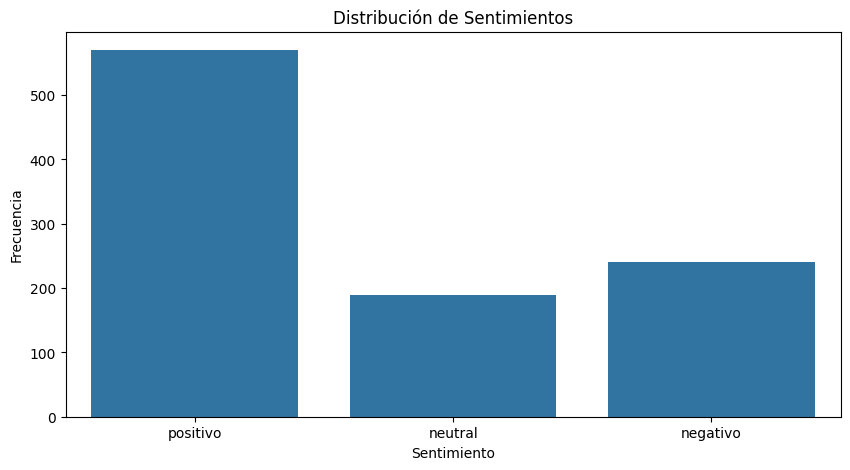

In [32]:
# Graficar la distribución de sentimientos
plt.figure(figsize=(10, 5))
sns.countplot(x='sentimiento', data=datos_muestra)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

Size of new BoW title = 1452


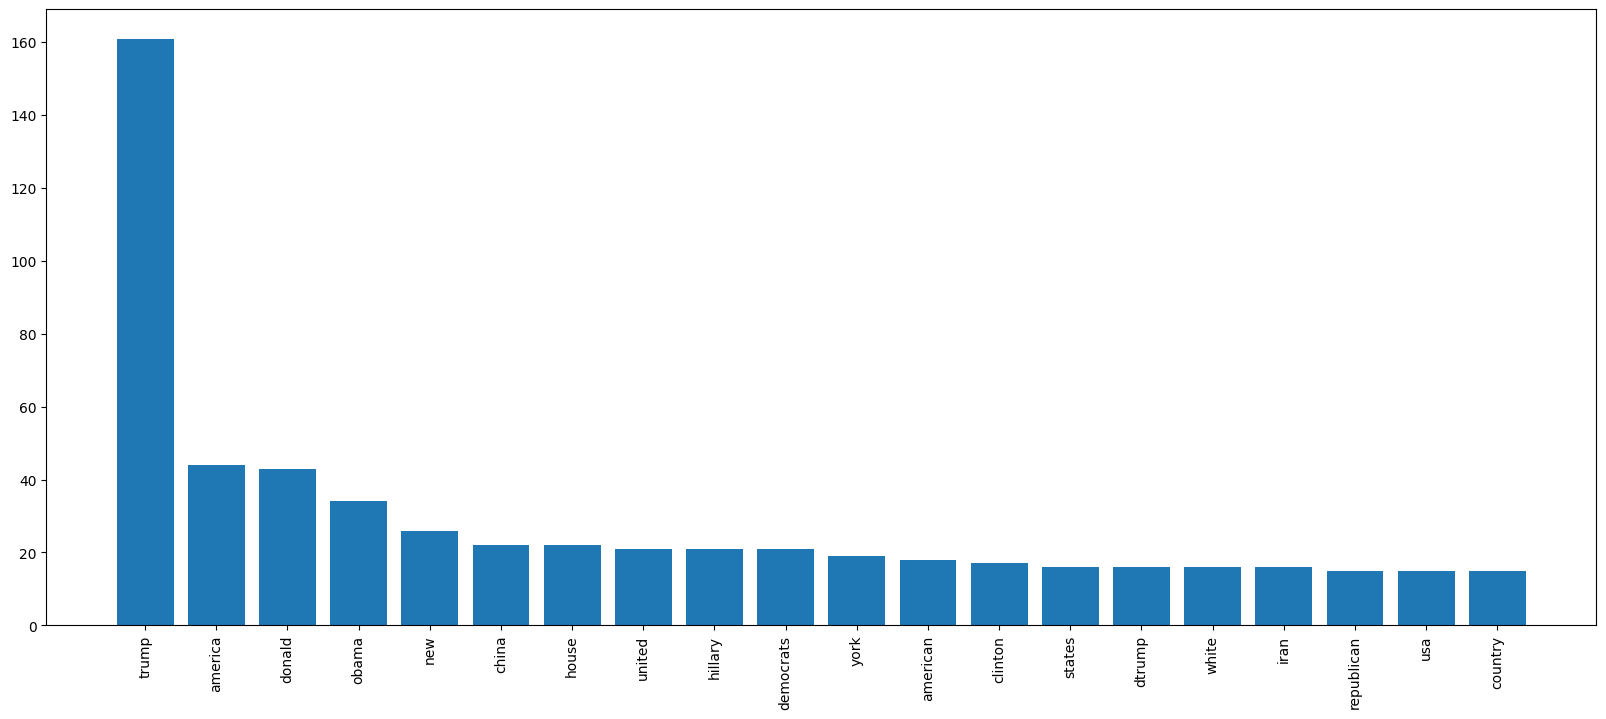

In [33]:
texto_frecuencia = " ".join(datos_muestra["entidades"].apply(texto_limpio))
tokens_ = nltk.FreqDist(texto_frecuencia.split())

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

**Análisis:**

- Los gráficos sugieren que los tweets tienden a tener un tono positico y discuten temas centrados en política y asuntos gubernamentales.
- El hecho de que los sentimientos positivos sean más comúnes podría ser que sean actividades favorables o puntos de vista positivos hacia Trump o siemplemente son más comnues entre sus seguidores.

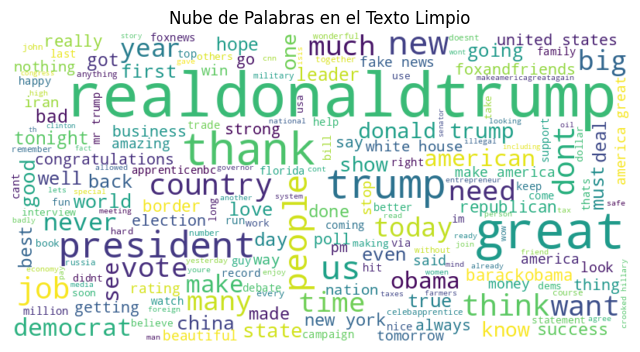

In [34]:
from wordcloud import WordCloud

# Unir todo el texto limpio en una sola cadena
texto_completo = ' '.join(datos_muestra['texto_limpio'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Graficar la nube de palabras
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitar los ejes
plt.title('Nube de Palabras en el Texto Limpio')
plt.show()

**Análisis:**
- Las palabras más destacadas son: "real", "Donald", "Trump", "great", "president", "country", "America", "vote", "thank", y "leader". Indican su alta frecuencia en el conjunto de datos.
- Las palabras como "country", "America", "vote", "president", y "leader" reflejan una fuerte inclinación hacia temas de política nacional y liderazgo.
- La palabra "thank" aparece prominentemente, sugiriendo que muchos de los tweets pueden ser respuestas a apoyos o eventos donde se expresan agradecimientos o reconocimientos.
- Palabras como "vote" indica un enfoque en las elecciones y el apoyo electoral.
- El uso frecuente de "Donald" y "Trump" en combinación sugiere que los tweets son altamente personalizados y centrados en la figura de Donald Trump.
- La presencia de palabras como "us" y "we" puede indicar una estrategia de comunicación que busca establecer una conexión directa con la audiencia o seguidores.



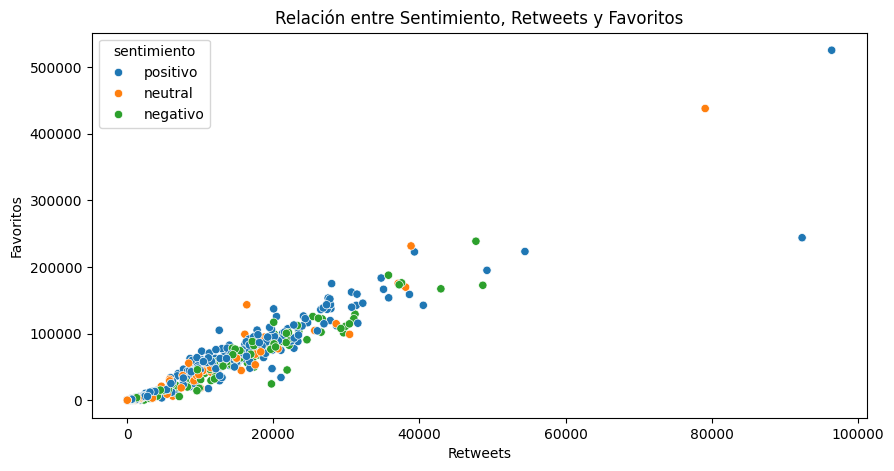

In [35]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='retweets', y='favorites', hue='sentimiento', data=datos_muestra)
plt.title('Relación entre Sentimiento, Retweets y Favoritos')
plt.xlabel('Retweets')
plt.ylabel('Favoritos')
plt.show()

**Análisis:**
- Sentimiento Positivo (azul): La mayoría de los puntos están coloreados de azul, lo que indica que los tweets con sentimiento positivo tienden a recibir una cantidad considerable de retweets y favoritos.
- Sentimiento Neutral (naranja): Representan los tweets neutrales, también están bastante dispersos, pero en general, parece que hay menos tweets neutrales con altos números de retweets y favoritos comparados con los positivos.
- Sentimiento Negativo (verde): Los puntos verdes, que indican sentimientos negativos, son menos frecuentes en el gráfico y tienden a tener menos retweets y favoritos en comparación con los positivos y neutrales, aunque hay excepciones con algunos puntos verdes alcanzando altos valores.
- Existe una correlación positiva clara entre retweets y favoritos, es decir, a medida que aumenta el número de retweets, generalmente también aumenta el número de favoritos.